In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import warnings
import matplotlib.pyplot as plt
from datetime import date

In [2]:
# Train Dataset
train = pd.read_csv("./Train/Train-1542865627584.csv")
beneficiary_train = pd.read_csv("./Train/Train_Beneficiarydata-1542865627584.csv")
inpatient_train = pd.read_csv("./Train/Train_Inpatientdata-1542865627584.csv")
outpatient_train = pd.read_csv("./Train/Train_Outpatientdata-1542865627584.csv")

# Test Dataset
test = pd.read_csv("./Test/Test-1542969243754.csv")
beneficiary_test = pd.read_csv("./Test/Test_Beneficiarydata-1542969243754.csv")
inpatient_test = pd.read_csv("./Test/Test_Inpatientdata-1542969243754.csv")
outpatient_test = pd.read_csv("./Test/Test_Outpatientdata-1542969243754.csv")


### Merging Data

In [3]:
Train_Allpatientdata=pd.merge(outpatient_train,inpatient_train,
                              left_on=['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
                              right_on=['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode']
                              ,how='outer')

In [4]:
Train_Allpatientdata=pd.merge(Train_Allpatientdata,beneficiary_train,on="BeneID")

In [5]:
Train_Allpatientdata=pd.merge(Train_Allpatientdata,train,on="Provider")

In [6]:
Train_Allpatientdata.head(5)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,2,2,2,2,2,0,0,30,50,Yes
1,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,1,1,1,1,2,0,0,1810,760,Yes
2,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,1,1,1,1,2,0,0,1810,760,Yes
3,BENE11004,CLM173224,2009-02-03,2009-02-03,PRV56011,20,PHY339887,NaN,NaN,20381,...,1,1,1,1,2,0,0,1810,760,Yes
4,BENE11004,CLM224741,2009-03-03,2009-03-03,PRV56011,40,PHY345721,NaN,NaN,V6546,...,1,1,1,1,2,0,0,1810,760,Yes


In [7]:
Train_Allpatientdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558211 entries, 0 to 558210
Data columns (total 55 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   BeneID                           558211 non-null  object 
 1   ClaimID                          558211 non-null  object 
 2   ClaimStartDt                     558211 non-null  object 
 3   ClaimEndDt                       558211 non-null  object 
 4   Provider                         558211 non-null  object 
 5   InscClaimAmtReimbursed           558211 non-null  int64  
 6   AttendingPhysician               556703 non-null  object 
 7   OperatingPhysician               114447 non-null  object 
 8   OtherPhysician                   199736 non-null  object 
 9   ClmDiagnosisCode_1               547758 non-null  object 
 10  ClmDiagnosisCode_2               362605 non-null  object 
 11  ClmDiagnosisCode_3               243055 non-null  object 
 12  Cl

### Preprocessing

Physician Preprocessing

In [8]:
def is_samephysician(row):
    atten_oper=row["AttendingPhysician"]==row["OperatingPhysician"]
    oper_other=row["OperatingPhysician"]==row["OtherPhysician"]
    atten_other=row["AttendingPhysician"]==row["OtherPhysician"]
    if atten_oper==True and oper_other==True:# atten = oper = other
        return 0
    elif atten_oper==True and oper_other==False:# atten = oper != other
        return 1
    elif atten_oper==False and oper_other==True:# atten != oper = other
        return 2
    else:# atten != oper != other
        return 3
    
phy_same=Train_Allpatientdata.apply(is_samephysician,axis=1)

In [9]:
Train_Allpatientdata["phy_same"]=phy_same

In [10]:
def count_physician(row,list_count):
    count=0
    for col in list_count:
        if pd.isnull(row[col]):
            continue
        else:
            count+=1
    return count
    
list_count=["AttendingPhysician","OperatingPhysician","OtherPhysician"]
phy_count=Train_Allpatientdata.apply(count_physician,axis=1,args=(list_count,))
Train_Allpatientdata["phy_count"]=phy_count

In [11]:
Train_Allpatientdata.head(4)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,phy_same,phy_count
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,2,2,2,0,0,30,50,Yes,3,1
1,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,1,1,2,0,0,1810,760,Yes,3,1
2,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,1,1,2,0,0,1810,760,Yes,3,1
3,BENE11004,CLM173224,2009-02-03,2009-02-03,PRV56011,20,PHY339887,NaN,NaN,20381,...,1,1,2,0,0,1810,760,Yes,3,1


### Claimed Period and Calculating age according to beneficiary

In [12]:
## Calulating Claimed Period
startdate= pd.to_datetime( Train_Allpatientdata["ClaimStartDt"] )
enddate= pd.to_datetime( Train_Allpatientdata["ClaimEndDt"] )

period = ( enddate - startdate).dt.days
Train_Allpatientdata["period"] = period

### Imputing

In [13]:
## Chronic code Preprocessing

cronic=Train_Allpatientdata.columns[ Train_Allpatientdata.columns.str.startswith("ChronicCond") ]
cronic_cols=Train_Allpatientdata[cronic]
cronics=cronic_cols.replace({2:0})
Train_Allpatientdata[   cronic   ]=cronics

In [14]:
## Potential Fraud

Train_Allpatientdata["PotentialFraud"]=Train_Allpatientdata["PotentialFraud"].replace({"Yes":1,"No":0})

In [15]:
## Admission Period

startadmt= pd.to_datetime( Train_Allpatientdata["AdmissionDt"] )
enddatadmt= pd.to_datetime( Train_Allpatientdata["DischargeDt"] )

periodadmt = ( enddatadmt - startadmt).dt.days
Train_Allpatientdata["periodadmt"] = periodadmt
Train_Allpatientdata["periodadmt"]=Train_Allpatientdata["periodadmt"].fillna(0)

In [16]:
## Renal Disease 

Train_Allpatientdata["RenalDiseaseIndicator"]=Train_Allpatientdata["RenalDiseaseIndicator"].replace({"Y":1})

In [17]:
## Calculating Age of a Person

birthdate=pd.to_datetime(Train_Allpatientdata["DOB"])
enddate=pd.to_datetime(Train_Allpatientdata["DOD"])

# cheack whether the patient dead or alife
def alive_function(value):
    if value==True:
        return 1
    else:
        return 0
alive = pd.isna(enddate).apply(alive_function)


# get the age of patient
max_date=enddate.dropna().max()
enddate[pd.isna(enddate)]=max_date
period=(((enddate-birthdate).dt.days/356).astype(int))

Train_Allpatientdata["age"]=period
Train_Allpatientdata["alive"]=alive

In [18]:
Train_Allpatientdata.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,phy_same,phy_count,period,periodadmt,age,alive
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,0,30,50,1,3,1,0,0.0,75,1
1,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,0,1810,760,1,3,1,0,0.0,89,1
2,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,0,1810,760,1,3,1,0,0.0,89,1
3,BENE11004,CLM173224,2009-02-03,2009-02-03,PRV56011,20,PHY339887,NaN,NaN,20381,...,0,1810,760,1,3,1,0,0.0,89,1
4,BENE11004,CLM224741,2009-03-03,2009-03-03,PRV56011,40,PHY345721,NaN,NaN,V6546,...,0,1810,760,1,3,1,0,0.0,89,1


In [19]:
Train_Allpatientdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558211 entries, 0 to 558210
Data columns (total 61 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   BeneID                           558211 non-null  object 
 1   ClaimID                          558211 non-null  object 
 2   ClaimStartDt                     558211 non-null  object 
 3   ClaimEndDt                       558211 non-null  object 
 4   Provider                         558211 non-null  object 
 5   InscClaimAmtReimbursed           558211 non-null  int64  
 6   AttendingPhysician               556703 non-null  object 
 7   OperatingPhysician               114447 non-null  object 
 8   OtherPhysician                   199736 non-null  object 
 9   ClmDiagnosisCode_1               547758 non-null  object 
 10  ClmDiagnosisCode_2               362605 non-null  object 
 11  ClmDiagnosisCode_3               243055 non-null  object 
 12  Cl

Grouping Data According to the amount Reimbursed

In [20]:
def groupby(df,by,vars_to_group,methods,col_ident,as_index=True,agg=False):
    if agg:
        grouped=df.groupby(by=by,as_index=as_index)[vars_to_group].agg(methods)
        cols=['_'.join(col) for col in grouped.columns.values]
        cols=[col_ident+"_"+col for col in cols]
        grouped.columns=cols
        return grouped
    
    else:
        concat=df.groupby(by=by,as_index=as_index)[vars_to_group].transform(methods[0])
        cols=[ col_ident+"_"+col+"_"+methods[0] for col in concat.columns ]
        concat.columns=cols
        
        for method in methods[1:]:
            grouped=df.groupby(by=by,as_index=as_index)[vars_to_group].transform(method)
            cols=[col_ident+"_"+col+"_"+method for col in grouped.columns]
            grouped.columns=cols
            concat=pd.concat([concat,grouped],axis=1)
        
        return concat

In [21]:
money=["InscClaimAmtReimbursed","DeductibleAmtPaid","NoOfMonths_PartACov","NoOfMonths_PartBCov",
           "IPAnnualReimbursementAmt","IPAnnualDeductibleAmt","OPAnnualReimbursementAmt","OPAnnualDeductibleAmt"]

In [22]:
provider_money=groupby(Train_Allpatientdata,["Provider"],money,
                    ["mean","std"],"provider",True,False)

In [23]:
banel_money=groupby(Train_Allpatientdata,["BeneID"],money,
                     ["mean","std"],"banel",True,False)

In [24]:
diag1_money=groupby(Train_Allpatientdata,["ClmDiagnosisCode_1"],money,["mean","std"],"diag1",
                       True,False)

In [25]:
selected_cols=["phy_same","phy_count","period","periodadmt","age","alive","Provider","PotentialFraud"]
selected_cols=Train_Allpatientdata[selected_cols]

In [26]:
data=pd.concat([selected_cols,provider_money,banel_money,diag1_money],axis=1)

In [28]:
grouped=data.groupby(by=["Provider","PotentialFraud"]).agg("mean").reset_index()


Train Validation Split

In [32]:
## Seperate X and Y

X=grouped.drop(axis=1,columns=['Provider','PotentialFraud'])
y=grouped['PotentialFraud']

Standardization

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [35]:
sc=StandardScaler()   # MinMaxScaler
sc.fit(X)
X_std=sc.transform(X)

# X_teststd=sc.transform(test.iloc[:,1:])   #Apply Standard Scaler to unseen data as well.

Let's Split Data in train and Validation

In [36]:
## 'stratify=y' will make sure equal distribution of yes:no in both train and validation

X_train,X_val,y_train,y_val = train_test_split(X_std,y,
                                               test_size=0.3,random_state=101,stratify=y,shuffle=True)

### Model Building

Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegressionCV

log = LogisticRegressionCV(cv=10,class_weight='balanced',
                           random_state=150)    

log.fit(X_train,y_train)

d:\SDlTek\venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\SDlTek\venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_

LogisticRegressionCV(class_weight='balanced', cv=10, random_state=150)

Logistic Regression Model Prediction for Train and Validation

C:\Users\DELL\AppData\Local\Temp\ipykernel_16724\1423061997.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(log.predict_proba(X_train)[:,1],color='darkblue')
C:\Users\DELL\AppData\Local\Temp\ipykernel_16724\1423061997.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(log.predict_proba(X_

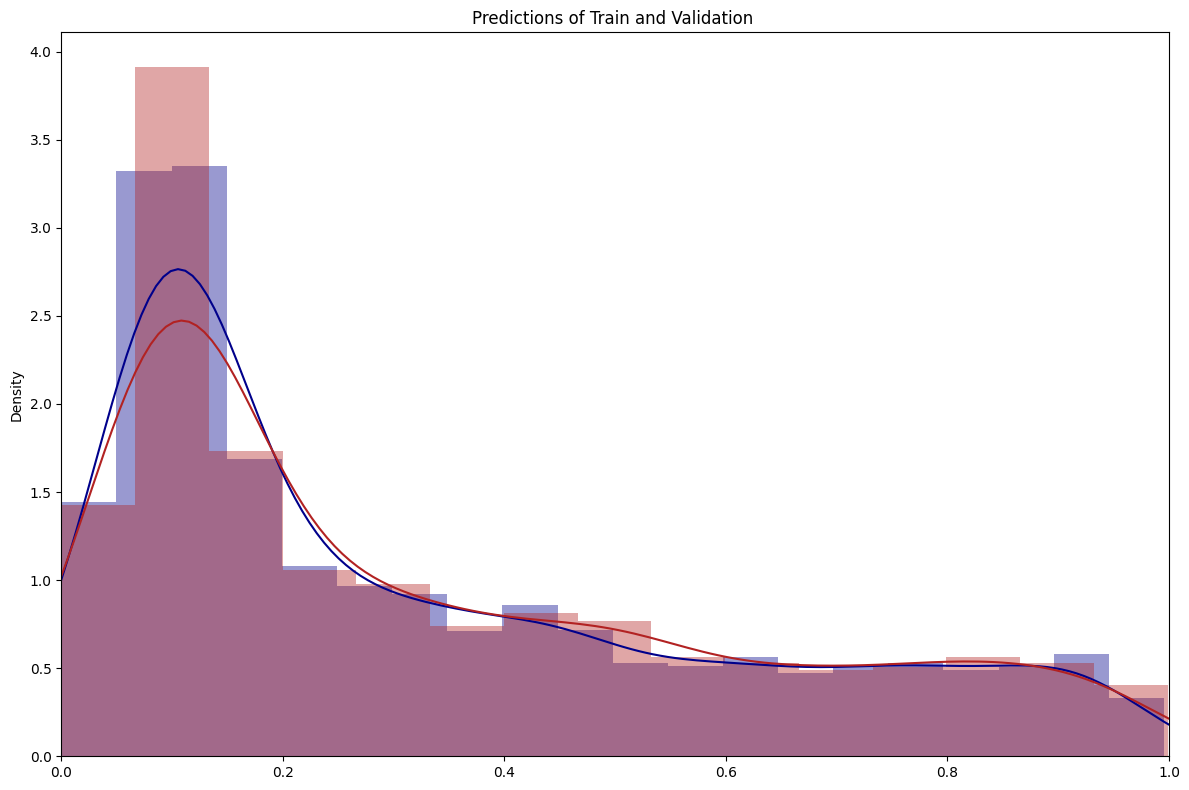

In [38]:
## Lets predict probability of 1 and 0 for X_train and X_val

log_train_pred_probability=log.predict_proba(X_train)
log_val_pred_probability=log.predict_proba(X_val)

# Lets compare model prediction performance on train and Validation both.

fig = plt.figure(figsize=(12,8))

sns.distplot(log.predict_proba(X_train)[:,1],color='darkblue')
sns.distplot(log.predict_proba(X_val)[:,1],color='firebrick')
plt.title('Predictions of Train and Validation ')
plt.xlim([0, 1])

plt.tight_layout()

plt.show()

Logistic Regression: Precision VS Recall Curve

In [39]:
from sklearn.metrics import precision_recall_curve,roc_curve,auc

In [40]:
fpr, tpr, thresholds =roc_curve(y_val, log.predict_proba(X_val)[:,1],pos_label=1)     #log_val_pred_probability[:,1])
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.857227


Text(0.5, 1.0, 'Precision Vs Recall')

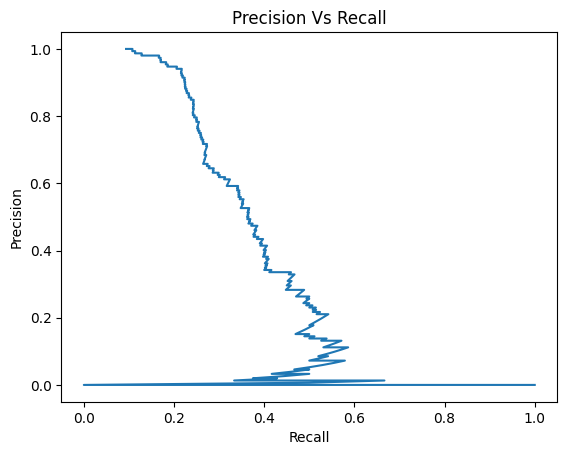

In [41]:
## Lets Check precision and recall 
precision, recall, _ = precision_recall_curve(y_val, log.predict_proba(X_val)[:,1])

plt.plot(precision,recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Vs Recall')

Logistic Regression: Evaluation

In [42]:
## Lets Set probability Threshold to 0.60

log_train_pred_60=(log.predict_proba(X_train)[:,1]>0.60).astype(bool)
log_val_pred_60=(log.predict_proba(X_val)[:,1]>0.60).astype(bool)   # set threshold as 0.60


In [43]:
#Confusion matrix, Accuracy, sensitivity and specificity

from sklearn.metrics import confusion_matrix,accuracy_score,cohen_kappa_score,roc_auc_score,f1_score,auc

cm0 = confusion_matrix(y_train, log_train_pred_60,labels=[1,0])
print('Confusion Matrix Train : \n', cm0)

cm1 = confusion_matrix(y_val, log_val_pred_60,labels=[1,0])
print('Confusion Matrix Val: \n', cm1)

total0=sum(sum(cm0))
total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy0=(cm0[0,0]+cm0[1,1])/total0
print ('Accuracy Train: ', accuracy0)

accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy Val: ', accuracy1)

sensitivity0 = cm0[0,0]/(cm0[0,0]+cm0[0,1])
print('Sensitivity Train : ', sensitivity0 )

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity Val: ', sensitivity1 )


specificity0 = cm0[1,1]/(cm0[1,0]+cm0[1,1])
print('Specificity Train: ', specificity0)

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity Val: ', specificity1)

KappaValue=cohen_kappa_score(y_val, log_val_pred_60)
print("Kappa Value :",KappaValue)
AUC=roc_auc_score(y_val, log_val_pred_60)

print("AUC         :",AUC)

print("F1-Score Train  : ",f1_score(y_train, log_train_pred_60))

print("F1-Score Val  : ",f1_score(y_val, log_val_pred_60))

Confusion Matrix Train : 
 [[ 260   94]
 [ 486 2947]]
Confusion Matrix Val: 
 [[  96   56]
 [ 229 1242]]
Accuracy Train:  0.8468444679165567
Accuracy Val:  0.8243992606284658
Sensitivity Train :  0.7344632768361582
Sensitivity Val:  0.631578947368421
Specificity Train:  0.8584328575589864
Specificity Val:  0.8443235893949694
Kappa Value : 0.3151097692971716
AUC         : 0.7379512683816952
F1-Score Train  :  0.47272727272727283
F1-Score Val  :  0.4025157232704403
